# Load the Diabetes dataset from Scikit Learn

In [30]:
! pip install --upgrade https://github.com/niketanpansare/future_of_data/raw/master/systemml-1.1.0-SNAPSHOT-python.tar.gz

    100% |████████████████████████████████| 10.3MB 102kB/s eta 0:00:01
    100% |████████████████████████████████| 13.8MB 83kB/s  eta 0:00:01
    100% |████████████████████████████████| 33.1MB 35kB/s  eta 0:00:01
    100% |████████████████████████████████| 8.7MB 143kB/s eta 0:00:01
    100% |████████████████████████████████| 4.9MB 259kB/s eta 0:00:01
    100% |████████████████████████████████| 2.0MB 644kB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 2.5MB/s eta 0:00:01
    100% |████████████████████████████████| 215kB 5.1MB/s eta 0:00:01
Requirement already up-to-date: six>=1.5 in /usr/local/src/conda3_runtime.v41/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages (from python-dateutil>=2.5.0->pandas->systemml==1.1.0)
  Running setup.py bdist_wheel for systemml ... done
  Stored in directory: /gpfs/fs01/user/s8af-a36c03f5ad3c29-6c4418a69e9e/.cache/pip/wheels/75/ca/50/f14a0f1cec72222376f5ced7749629ca44194d8245c2e4939d
Successfully built systemml


In [31]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

(422, 1)
(422, 1)


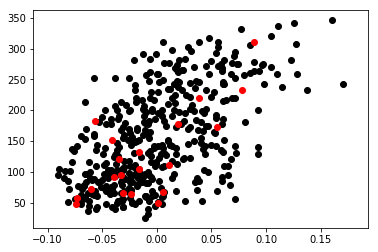

In [46]:
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:,np.newaxis,2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = np.matrix(diabetes.target[:-20]).T
diabetes_y_test = np.matrix(diabetes.target[-20:]).T

diabetes_y_train_plot = diabetes.target[:-20]
diabetes_y_test_plot = diabetes.target[-20:]

print(diabetes_X_train.shape)
print(diabetes_y_train.shape)
plt.scatter(diabetes_X_train,diabetes_y_train_plot,color='black')
plt.scatter(diabetes_X_test,diabetes_y_test_plot,color='red')

In [26]:
diabetes_y_train

matrix([[ 151.],
        [  75.],
        [ 141.],
        [ 206.],
        [ 135.],
        [  97.],
        [ 138.],
        [  63.],
        [ 110.],
        [ 310.],
        [ 101.],
        [  69.],
        [ 179.],
        [ 185.],
        [ 118.],
        [ 171.],
        [ 166.],
        [ 144.],
        [  97.],
        [ 168.],
        [  68.],
        [  49.],
        [  68.],
        [ 245.],
        [ 184.],
        [ 202.],
        [ 137.],
        [  85.],
        [ 131.],
        [ 283.],
        [ 129.],
        [  59.],
        [ 341.],
        [  87.],
        [  65.],
        [ 102.],
        [ 265.],
        [ 276.],
        [ 252.],
        [  90.],
        [ 100.],
        [  55.],
        [  61.],
        [  92.],
        [ 259.],
        [  53.],
        [ 190.],
        [ 142.],
        [  75.],
        [ 142.],
        [ 155.],
        [ 225.],
        [  59.],
        [ 104.],
        [ 182.],
        [ 128.],
        [  52.],
        [  37.],
        [ 170.

# Linear Regression Direct Solve (No Regularization)

In [38]:
from systemml import MLContext, dml

# create a MLContext object
ml = MLContext(sc)
print(ml.info())

Archiver-Version: Plexus Archiver
Artifact-Id: systemml
Build-Jdk: 1.8.0_121
Build-Time: 2017-09-08 08:50:38 UTC
Built-By: asurve
Created-By: Apache Maven 3.3.9
Group-Id: org.apache.systemml
Main-Class: org.apache.sysml.api.DMLScript
Manifest-Version: 1.0
Minimum-Recommended-Spark-Version: 2.1.0
Version: 0.15.0



In [39]:
script = """
    # Add constant feature to X to model intercept
    ones = matrix(1,rows=nrow(X),cols=1)
    X = cbind(X,ones)
    A = t(X) %*% X
    b = t(X) %*% y
    w = solve(A,b)
    bias = as.scalar(w[nrow(w),1])
    w = w[1:nrow(w)-1,]
"""

In [48]:
prog = dml(script).input(X=diabetes_X_train,y=diabetes_y_train).output('w','bias')
w, bias = ml.execute(prog).get('w','bias')
w = w.toNumPy()

SystemML Statistics:
Total execution time:		0.002 sec.
Number of executed Spark inst:	2.




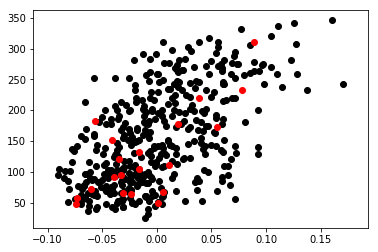

In [49]:
plt.scatter(diabetes_X_train,diabetes_y_train_plot,color='black')
plt.scatter(diabetes_X_test,diabetes_y_test_plot,color='red')
plt.plot(diabetes_X_test,)